In [67]:
import pandas as pd
import matplotlib.pyplot as plt
df_train=pd.read_csv(r"C:\Users\ashis\Downloads\train.csv")
df_test=pd.read_csv(r"C:\Users\ashis\Downloads\test.csv")
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV
print (df_train.shape)
print (df_test.shape)
#separating target variable
Y=df_train["y"]
X_train=df_train.drop("y",axis=1)
#checking for missing values and getting column names which are missing
Missing=pd.isnull(X_train).sum().reset_index()
Missing.columns=["columns","values"]
Missing_columns=Missing[Missing["values"]>0]["columns"].tolist()
print (Missing_columns)#fortunately there are no missing  values
#checking the variables which have only one unique value 
def uniquevalues(df):
    df1=df.copy()
    unique_val_col=[]
    for col in df1.columns:
        if df1[col].nunique()==1:   
            unique_val_col.append(col)
    return unique_val_col
unique_col_list=uniquevalues(X_train)
print (unique_col_list)
#while using trees theese variables don't contribute much to the model and check using variable importance measures using randomforest and xgboost
#dropping the id variable as it is just the unique identification given to each observation
X_train=X_train.drop("ID",axis=1)
#checking the count of categories of each categorical variables
def categoricalvariables(df):
    df2=df.copy()
    category=[]
    for col in df2.columns:
        if df2[col].dtype==object:
            category.append(col)
    return category
categorical_variables=categoricalvariables(X_train)
print (categorical_variables)
#after one hot encoding how many new columns will be added.
df_categorical=X_train[categorical_variables].copy()
categories=df_categorical.apply(lambda x:x.value_counts())
count_categories=categories.apply(lambda x:x.count()).reset_index()
count_categories.columns=["categories","count"]
print (len(X_train.columns)+int(count_categories["count"].sum())-len(categorical_variables))
#one hot encoding of train and test data sets
X_train=pd.get_dummies(X_train)
df_test=pd.get_dummies(df_test).reindex(columns=X_train.columns,fill_value=0)
print (len(X_train.columns))
print (len(df_test.columns))#As expected we got the same columns in test and train data set
print(X_train.dtypes)

(4209, 378)
(4209, 377)
[]
['X11', 'X93', 'X107', 'X233', 'X235', 'X268', 'X289', 'X290', 'X293', 'X297', 'X330', 'X347']
['X0', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X8']
563
563
563
X10     int64
X11     int64
X12     int64
X13     int64
X14     int64
X15     int64
X16     int64
X17     int64
X18     int64
X19     int64
X20     int64
X21     int64
X22     int64
X23     int64
X24     int64
X26     int64
X27     int64
X28     int64
X29     int64
X30     int64
X31     int64
X32     int64
X33     int64
X34     int64
X35     int64
X36     int64
X37     int64
X38     int64
X39     int64
X40     int64
        ...  
X6_h    uint8
X6_i    uint8
X6_j    uint8
X6_k    uint8
X6_l    uint8
X8_a    uint8
X8_b    uint8
X8_c    uint8
X8_d    uint8
X8_e    uint8
X8_f    uint8
X8_g    uint8
X8_h    uint8
X8_i    uint8
X8_j    uint8
X8_k    uint8
X8_l    uint8
X8_m    uint8
X8_n    uint8
X8_o    uint8
X8_p    uint8
X8_q    uint8
X8_r    uint8
X8_s    uint8
X8_t    uint8
X8_u    uint8
X8_v    uint8
X8_w 

In [97]:
#tuning hyperparameters of xgboost by using xgboost cv
from sklearn.metrics import r2_score
import numpy as np
def xgboost_r2(preds,xgb_train):
    labels=xgb_train.get_label()
    return "r2",r2_score(labels,preds)
    
import xgboost as xgb
xgb_train=xgb.DMatrix(X_train,label=Y.values)
params={"max_depth":5,"min_child_weight":1,"subsample":1,"colsample_bytree":1,"objective":"reg:linear","eta":0.1,"seed":0}
model=xgb.cv(params,xgb_train,num_boost_round=1000,nfold=10,feval=xgboost_r2,early_stopping_rounds=50,verbose_eval=True,maximize=True)

[0]	train-r2:-50.5164+0.755572	test-r2:-51.4186+5.75629
[1]	train-r2:-40.8232+0.610372	test-r2:-41.5495+4.63511
[2]	train-r2:-32.9694+0.492728	test-r2:-33.5548+3.72942
[3]	train-r2:-26.606+0.397407	test-r2:-27.0764+2.99782
[4]	train-r2:-21.45+0.320182	test-r2:-21.8289+2.40851
[5]	train-r2:-17.2725+0.257619	test-r2:-17.5765+1.9321
[6]	train-r2:-13.8877+0.206938	test-r2:-14.1314+1.54813
[7]	train-r2:-11.1452+0.165886	test-r2:-11.3406+1.23938
[8]	train-r2:-8.92302+0.13265	test-r2:-9.07966+0.990703
[9]	train-r2:-7.12245+0.105759	test-r2:-7.24769+0.791141
[10]	train-r2:-5.66343+0.0839994	test-r2:-5.76318+0.63093
[11]	train-r2:-4.48108+0.0663858	test-r2:-4.5599+0.502985
[12]	train-r2:-3.52289+0.052145	test-r2:-3.58534+0.401142
[13]	train-r2:-2.74633+0.0406606	test-r2:-2.79535+0.321025
[14]	train-r2:-2.11684+0.03143	test-r2:-2.1556+0.258157
[15]	train-r2:-1.6064+0.0241026	test-r2:-1.63794+0.21038
[16]	train-r2:-1.19234+0.0182714	test-r2:-1.21856+0.174883
[17]	train-r2:-0.856194+0.0137142	test

In [104]:
#106 are the initial estimate for the learning rate 0.1
param_grid={"max_depth":range(3,10,2),"min_child_weight":range(1,6,2)}
model1=xgb.XGBRegressor(n_estimators=106,colsample_bytree=1,subsample=1,objective="reg:linear",gamma=0,learning_rate=0.1)
gridsearchcv=GridSearchCV(model1,param_grid,cv=10,scoring="r2")
gridsearchcv.fit(X_train,Y)
print (gridsearchcv.best_params_)

{'max_depth': 3, 'min_child_weight': 5}


In [106]:
#tuning gamma value
param_grid1={"gamma":[i/10 for i in range(0,10)]}
model2=xgb.XGBRegressor(n_estimators=106,colsample_bytree=1,subsample=1,objective="reg:linear",gamma=0,learning_rate=0.1,min_child_weight=5,max_depth=3)
gridsearchcv=GridSearchCV(model1,param_grid1,cv=10,scoring="r2")
gridsearchcv.fit(X_train,Y)
print (gridsearchcv.best_params_)
print (gridsearchcv.best_score_)

{'gamma': 0.9}
0.573245591948


In [108]:
#tuning subsample and colsample_bytree
param_grid2={"subsample":[i/10 for i in range(6,10)],"colsample_bytree":[i/10 for i in range(6,10)]}
model3=xgb.XGBRegressor(n_estimators=106,objective="reg:linear",gamma=0,learning_rate=0.1,min_child_weight=5,max_depth=3,seed=0)
gridsearchcv=GridSearchCV(model1,param_grid2,cv=10,scoring="r2")
gridsearchcv.fit(X_train,Y)
print (gridsearchcv.best_params_)
print (gridsearchcv.best_score_)

{'colsample_bytree': 0.9, 'subsample': 0.9}
0.57340969507


In [111]:
#tuning regularisation parameters
param_grid2={"reg_alpha":[0,0.005,0.001,0.01,0.05,0.1,1,10]}
model4=xgb.XGBRegressor(n_estimators=106,colsample_bytree=0.9,subsample=0.9,objective="reg:linear",gamma=0,learning_rate=0.1,min_child_weight=5,max_depth=3,seed=0)
gridsearchcv=GridSearchCV(model1,param_grid2,cv=10,scoring="r2")
gridsearchcv.fit(X_train,Y)
print (gridsearchcv.best_params_)
print (gridsearchcv.best_score_)

{'reg_alpha': 0.001}
0.573426202798


In [120]:
params={"max_depth":3,"min_child_weight":5,"subsample":0.9,"colsample_bytree":0.9,"objective":"reg:linear","eta":0.01,"seed":0}
model5=xgb.cv(params,xgb_train,num_boost_round=1000,nfold=10,feval=xgboost_r2,early_stopping_rounds=50,verbose_eval=True,maximize=True)

[0]	train-r2:-61.2276+0.916083	test-r2:-62.3228+6.99837
[1]	train-r2:-59.9997+0.897714	test-r2:-61.0727+6.85582
[2]	train-r2:-58.7959+0.879593	test-r2:-59.8473+6.7162
[3]	train-r2:-57.6164+0.861895	test-r2:-58.6465+6.5794
[4]	train-r2:-56.4607+0.844927	test-r2:-57.4698+6.44477
[5]	train-r2:-55.3275+0.827934	test-r2:-56.3161+6.31336
[6]	train-r2:-54.2167+0.811662	test-r2:-55.1853+6.18436
[7]	train-r2:-53.1279+0.795292	test-r2:-54.0769+6.05838
[8]	train-r2:-52.0611+0.779186	test-r2:-52.991+5.93491
[9]	train-r2:-51.0156+0.763479	test-r2:-51.9264+5.81364
[10]	train-r2:-49.9907+0.748107	test-r2:-50.883+5.69484
[11]	train-r2:-48.9862+0.733064	test-r2:-49.8603+5.57862
[12]	train-r2:-48.0014+0.718307	test-r2:-48.8579+5.46464
[13]	train-r2:-47.0361+0.70377	test-r2:-47.875+5.35276
[14]	train-r2:-46.0905+0.689669	test-r2:-46.9122+5.24339
[15]	train-r2:-45.1634+0.675536	test-r2:-45.9685+5.13627
[16]	train-r2:-44.255+0.662121	test-r2:-45.0436+5.03129
[17]	train-r2:-43.3642+0.648799	test-r2:-44.1367

[143]	train-r2:-2.93783+0.0431498	test-r2:-2.98973+0.3392
[144]	train-r2:-2.86822+0.0421193	test-r2:-2.91895+0.332099
[145]	train-r2:-2.8+0.0411385	test-r2:-2.84951+0.325044
[146]	train-r2:-2.73319+0.0401516	test-r2:-2.78152+0.318216
[147]	train-r2:-2.66769+0.03919	test-r2:-2.71486+0.311663
[148]	train-r2:-2.60341+0.0382599	test-r2:-2.64955+0.30519
[149]	train-r2:-2.54047+0.0373728	test-r2:-2.58556+0.298851
[150]	train-r2:-2.47868+0.0364795	test-r2:-2.52275+0.292723
[151]	train-r2:-2.41813+0.0355674	test-r2:-2.46123+0.28675
[152]	train-r2:-2.35878+0.0347354	test-r2:-2.4009+0.280903
[153]	train-r2:-2.30062+0.0338245	test-r2:-2.34184+0.275201
[154]	train-r2:-2.24367+0.0330413	test-r2:-2.28396+0.269519
[155]	train-r2:-2.18777+0.0322499	test-r2:-2.22716+0.264067
[156]	train-r2:-2.13298+0.031365	test-r2:-2.17148+0.258797
[157]	train-r2:-2.07933+0.0305953	test-r2:-2.11695+0.253642
[158]	train-r2:-2.02673+0.0298344	test-r2:-2.06357+0.248634
[159]	train-r2:-1.97515+0.0290806	test-r2:-2.0111+0.

[277]	train-r2:0.336844+0.00963804	test-r2:0.332365+0.0989622
[278]	train-r2:0.341665+0.00968834	test-r2:0.337221+0.0989058
[279]	train-r2:0.346383+0.00975064	test-r2:0.341942+0.0988289
[280]	train-r2:0.351018+0.0097885	test-r2:0.346599+0.0987683
[281]	train-r2:0.355547+0.00981485	test-r2:0.351103+0.0987249
[282]	train-r2:0.360021+0.0098466	test-r2:0.355532+0.0986439
[283]	train-r2:0.36438+0.00989738	test-r2:0.35989+0.0985698
[284]	train-r2:0.368666+0.00992577	test-r2:0.364121+0.0985702
[285]	train-r2:0.372866+0.00996749	test-r2:0.368338+0.0985002
[286]	train-r2:0.376984+0.0100218	test-r2:0.372408+0.0984629
[287]	train-r2:0.381017+0.0100404	test-r2:0.376427+0.0984317
[288]	train-r2:0.384964+0.0100803	test-r2:0.380345+0.0983946
[289]	train-r2:0.388823+0.0101317	test-r2:0.384185+0.0983498
[290]	train-r2:0.392641+0.0101629	test-r2:0.387962+0.0982819
[291]	train-r2:0.396372+0.0101872	test-r2:0.39166+0.0982116
[292]	train-r2:0.400045+0.0102118	test-r2:0.395304+0.0981712
[293]	train-r2:0.403

[413]	train-r2:0.572019+0.0117371	test-r2:0.55874+0.0925706
[414]	train-r2:0.572412+0.0117361	test-r2:0.559041+0.0925068
[415]	train-r2:0.572783+0.0117398	test-r2:0.559341+0.0924558
[416]	train-r2:0.573182+0.0117273	test-r2:0.559644+0.0924299
[417]	train-r2:0.573566+0.0117233	test-r2:0.559961+0.09241
[418]	train-r2:0.573941+0.0117127	test-r2:0.560224+0.0924003
[419]	train-r2:0.574317+0.0117022	test-r2:0.560489+0.0923451
[420]	train-r2:0.574682+0.0116871	test-r2:0.560735+0.0922954
[421]	train-r2:0.575063+0.0116873	test-r2:0.561004+0.0922613
[422]	train-r2:0.575396+0.0116854	test-r2:0.561243+0.092247
[423]	train-r2:0.575732+0.0116901	test-r2:0.561499+0.0922451
[424]	train-r2:0.576074+0.011694	test-r2:0.561776+0.0922184
[425]	train-r2:0.576415+0.0117067	test-r2:0.562051+0.0921677
[426]	train-r2:0.576755+0.0116995	test-r2:0.562285+0.0921484
[427]	train-r2:0.577075+0.0116871	test-r2:0.562497+0.0921054
[428]	train-r2:0.577389+0.0116874	test-r2:0.562703+0.09206
[429]	train-r2:0.577688+0.01169

[549]	train-r2:0.596875+0.0114706	test-r2:0.572981+0.0893932
[550]	train-r2:0.59696+0.0114604	test-r2:0.572984+0.0893824
[551]	train-r2:0.597025+0.0114535	test-r2:0.573015+0.089353
[552]	train-r2:0.597103+0.0114413	test-r2:0.573046+0.0893512
[553]	train-r2:0.597184+0.0114352	test-r2:0.573076+0.0893495
[554]	train-r2:0.597291+0.0114392	test-r2:0.573067+0.089361
[555]	train-r2:0.597376+0.0114262	test-r2:0.573066+0.0893406
[556]	train-r2:0.597445+0.0114265	test-r2:0.573081+0.0893269
[557]	train-r2:0.597528+0.0114149	test-r2:0.573078+0.0892958
[558]	train-r2:0.597617+0.0114006	test-r2:0.573088+0.0892715
[559]	train-r2:0.597693+0.0114098	test-r2:0.573111+0.0892555
[560]	train-r2:0.597751+0.0114078	test-r2:0.573122+0.0892711
[561]	train-r2:0.597816+0.0114117	test-r2:0.573148+0.0892558
[562]	train-r2:0.597894+0.011406	test-r2:0.573158+0.0892453
[563]	train-r2:0.597982+0.011408	test-r2:0.573175+0.0892214
[564]	train-r2:0.598038+0.0114028	test-r2:0.573175+0.0892088
[565]	train-r2:0.598121+0.011

In [126]:
#best number of estimators
print (model5["test-r2-mean"].argmax())

616


In [130]:
#final crosschecking wiht scoring=r2
from sklearn.model_selection import cross_val_score
final_model=xgb.XGBRegressor(n_estimators=616,colsample_bytree=0.9,subsample=0.9,objective="reg:linear",gamma=0.9,learning_rate=0.01,min_child_weight=5,max_depth=3,seed=0,reg_alpha=0.001)
print (np.mean(cross_val_score(final_model,X_train,Y,cv=10,scoring="r2")))

0.576195289007


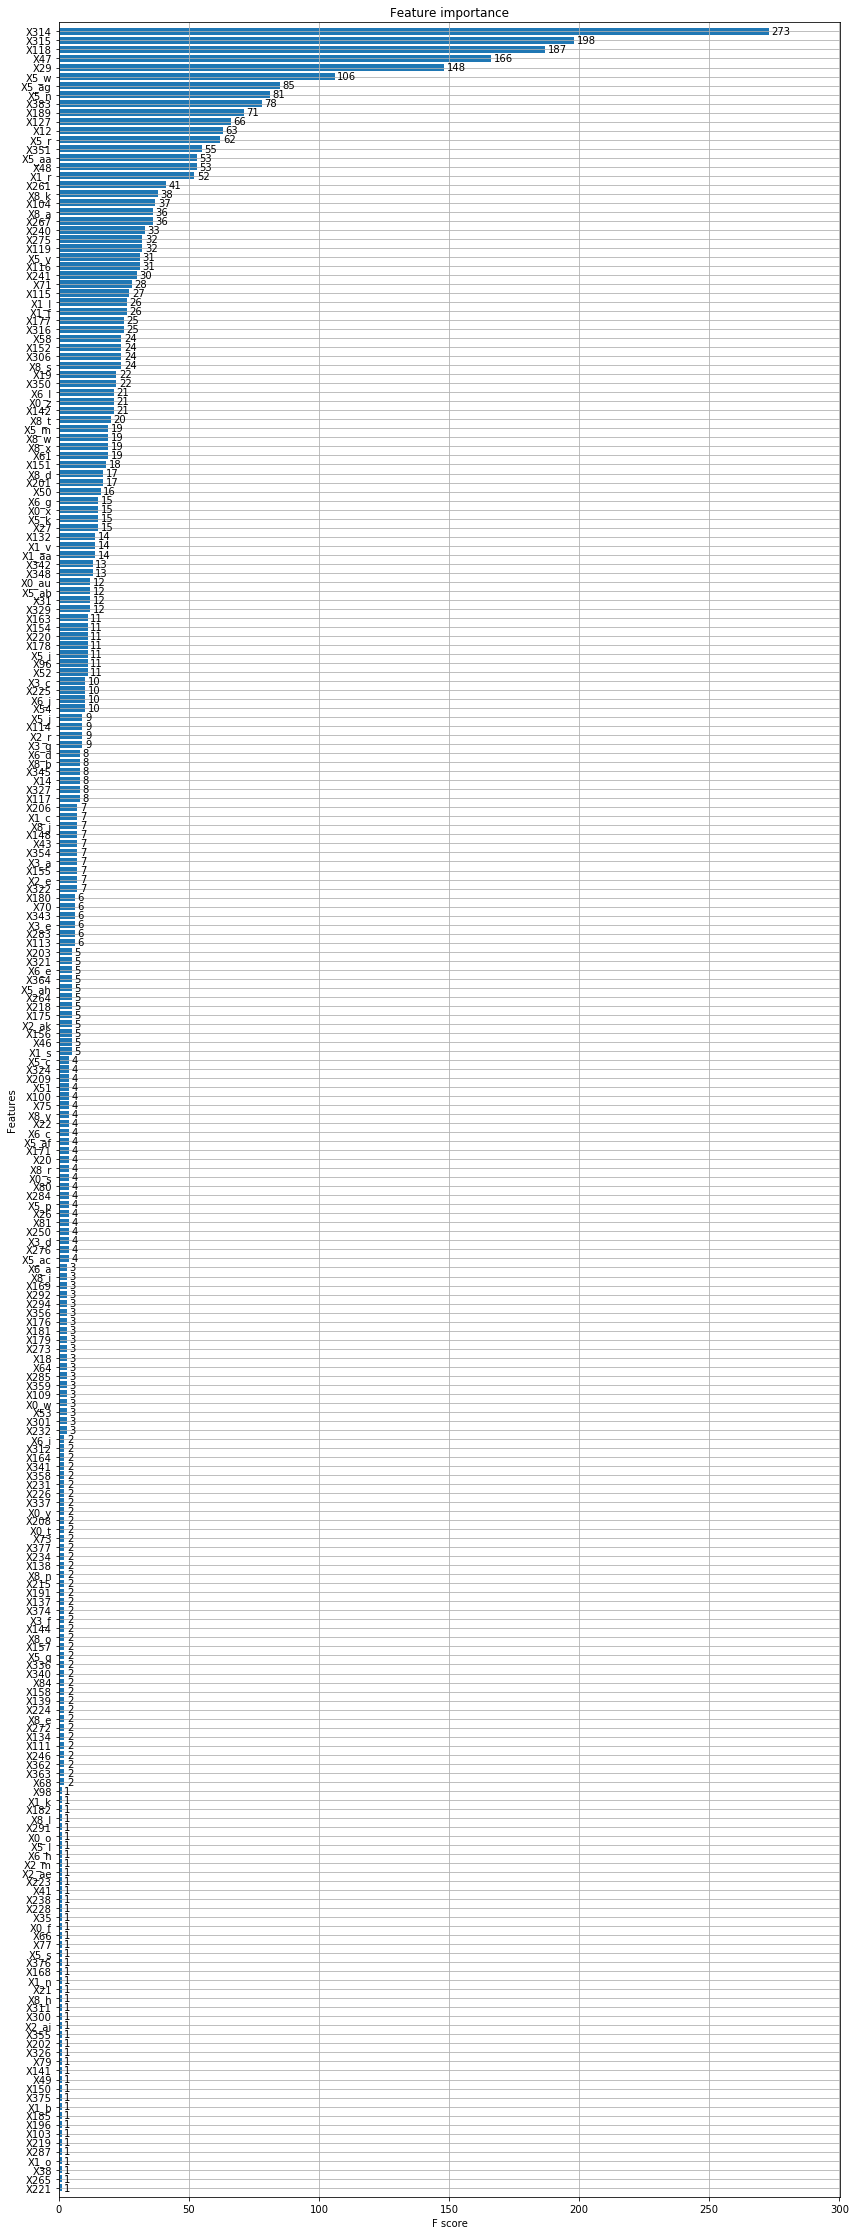

In [153]:
figure,axes=plt.subplots(figsize=(14,40))
xgb.plot_importance(final_model, height=0.8,ax=axes)
plt.show()